### Ejemplo de regresión lineal

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar dataset
df = pd.read_csv('winequality.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Las métricas de regresión lineal son indicadores que evalúan la bondad del ajuste del modelo de regresión lineal a los datos. A continuación, te presento algunas de las métricas más comunes:
1. Coeficiente de Determinación (R²): Mide la proporción de varianza explicada por el modelo. Valores cercanos a 1 indican un buen ajuste.
2. Error Cuadrático Medio (MSE): Calcula la diferencia cuadrática media entre los valores observados y predichos. Valores bajos indican un buen ajuste.
3. Raíz del Error Cuadrático Medio (RMSE): Es la raíz cuadrada del MSE. Valores bajos indican un buen ajuste.
4. Coeficiente de Correlación de Pearson (r): Mide la relación lineal entre las variables. Valores cercanos a 1 o -1 indican una fuerte correlación.
5. Punto de Intersección (β0): Valor de la variable dependiente cuando la variable independiente es 0.
6. Pendiente (β1): Cambio en la variable dependiente por cada unidad de cambio en la variable independiente.
7. Intervalo de Confianza: Estima el rango de valores posibles para los coeficientes del modelo.
8. Valor-p: Probabilidad de obtener un coeficiente tan extremo o más, suponiendo que la verdadera relación es nula.
9. Coeficiente de Determinación Ajustado (R² ajustado): Ajusta el R² por el número de variables independientes.
Estas métricas te ayudarán a evaluar la calidad de tu modelo de regresión lineal. ¿Necesitas más información sobre alguna de ellas?









## El Error Cuadrático Medio es una métrica que mide la precisión de un modelo de regresión. 
## Fórmula:
### MSE = (1/n) * Σ(y_true - y_pred)^2
### Donde:
- y_true: valores reales de la variable dependiente
- y_pred: valores predichos por el modelo
- n: número de observaciones


## Interpretación:
### El MSE mide la diferencia cuadrática media entre los valores reales y predichos.
Valores bajos de MSE indican que el modelo se ajusta bien a los datos.
Valores altos de MSE indican que el modelo no se ajusta bien a los datos.

Ventajas:
- Es una métrica fácil de calcular y entender.
- Penaliza los errores grandes más que los pequeños.

Desventajas:
- Es sensible a outliers (valores atípicos).
- No es robusto para datos con varianza heterogénea.


Uso común:
- Evaluación de modelos de regresión lineal y no lineal.
- Comparación de la precisión de diferentes modelos.


Relación con otras métricas:
- RMSE (Raíz del Error Cuadrático Medio): es la raíz cuadrada del MSE.
- MAE (Error Absoluto Medio): es similar al MSE, pero utiliza valores absolutos en lugar de cuadrados.

Consejos:
- Un MSE cercano a cero indica un buen ajuste del modelo.
-Un MSE alto puede indicar sobreajuste o subajuste del modelo.
- Es importante considerar otras métricas, como R² y RMSE, para obtener una visión completa del desempeño del modelo.

In [8]:

# Preparar datos
X = df.drop('quality', axis=1)
y = df['quality']

# Elijo 1 variable independiente

"""X = df[['chlorides','citric acid']]
y = df['quality']"""


# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión lineal
model = LinearRegression()

# Entrenar modelo
model.fit(X_train, y_train)

# Predecir calidad del vino
y_pred = model.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Coeficiente de determinación (R²)
r2 = model.score(X_test, y_test)
print(f'R²: {r2:.2f}')

MSE: 0.57
R²: 0.27


In [9]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

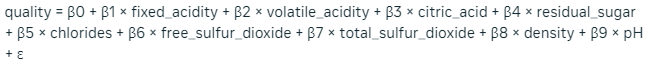


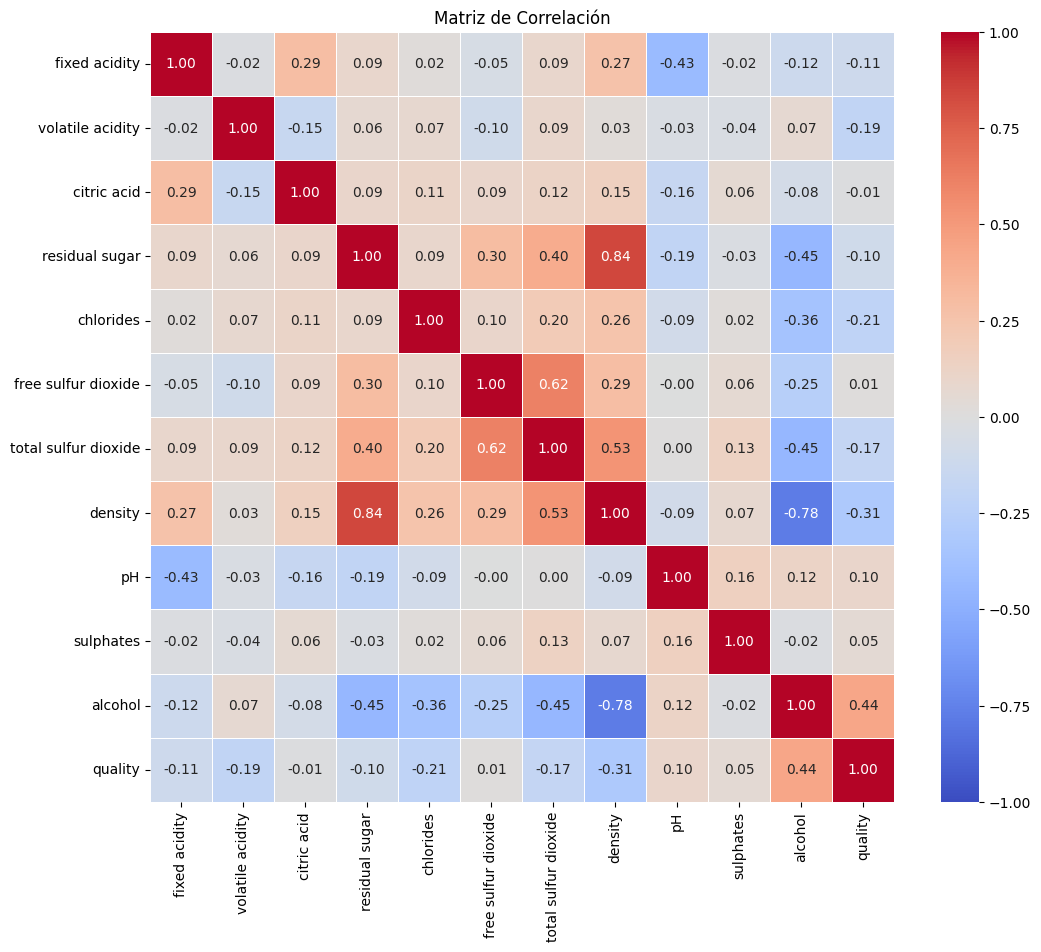

In [49]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

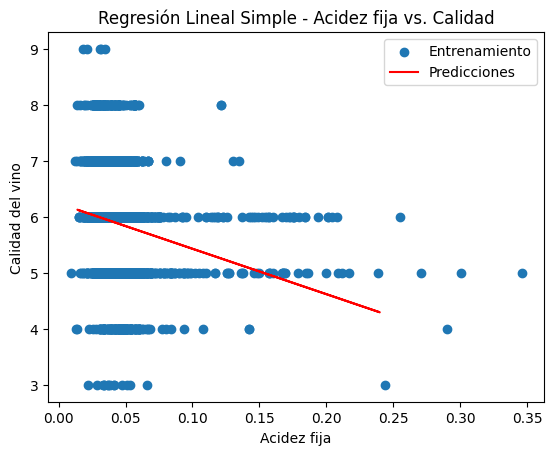

In [35]:
import matplotlib.pyplot as plt

# Graficar datos de entrenamiento
plt.scatter(X_train, y_train, label='Entrenamiento')

# Graficar predicciones
plt.plot(X_test, y_pred, label='Predicciones', color='red')

# Graficar línea de regresión
#plt.plot(X_test, model.predict(X_test), label='Regresión', color='green')

# Configurar gráfico
plt.xlabel('Acidez fija')
plt.ylabel('Calidad del vino')
plt.title('Regresión Lineal Simple - Acidez fija vs. Calidad')
plt.legend()
plt.show()

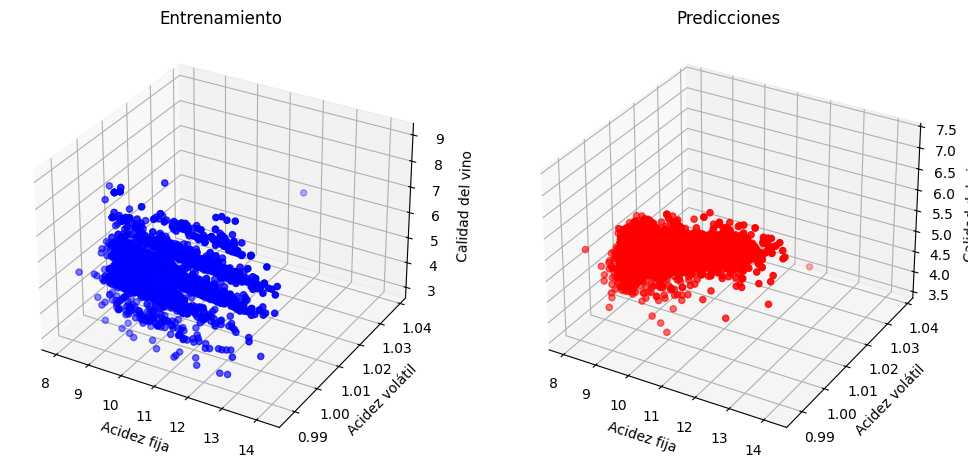

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura 3D
fig = plt.figure(figsize=(12, 6))

# Graficar datos de entrenamiento en 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train['alcohol'], X_train['density'], y_train, label='Entrenamiento', c='blue')
ax1.set_xlabel('Acidez fija')
ax1.set_ylabel('Acidez volátil')
ax1.set_zlabel('Calidad del vino')
ax1.set_title('Entrenamiento')

# Graficar predicciones en 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_train['alcohol'], X_train['density'], model.predict(X_train), label='Predicciones', c='red')
ax2.set_xlabel('Acidez fija')
ax2.set_ylabel('Acidez volátil')
ax2.set_zlabel('Calidad del vino')
ax2.set_title('Predicciones')

plt.show()

Las métricas de regresión lineal son indicadores que evalúan la bondad del ajuste del modelo de regresión lineal a los datos. A continuación, te presento algunas de las métricas más comunes:

Coeficiente de Determinación (R2): Mide la proporción de varianza explicada por el modelo. Valores cercanos a 1 indican un buen ajuste.
Error Cuadrático Medio (MSE): Calcula la diferencia cuadrática media entre los valores observados y predichos. Valores bajos indican un buen ajuste.
Raíz del Error Cuadrático Medio (RMSE): Es la raíz cuadrada del MSE. Valores bajos indican un buen ajuste.
Coeficiente de Correlación de Pearson (r): Mide la relación lineal entre las variables. Valores cercanos a 1 o -1 indican una fuerte correlación.
Punto de Intersección (β0): Valor de la variable dependiente cuando la variable independiente es 0.
Pendiente (β1): Cambio en la variable dependiente por cada unidad de cambio en la variable independiente.
Intervalo de Confianza: Estima el rango de valores posibles para los coeficientes del modelo.
Valor-p: Probabilidad de obtener un coeficiente tan extremo o más, suponiendo que la verdadera relación es nula.
Coeficiente de Determinación Ajustado (R² ajustado): Ajusta el R² por el número de variables independientes.


### El Error Cuadrático Medio es una métrica que mide la precisión de un modelo de regresión.
Fórmula:
###  MSE = (1/n) * Σ(y_true - y_pred)^2
Donde:¶
- y_true: valores reales de la variable dependiente
- y_pred: valores predichos por el modelo
- n: número de observaciones

Interpretación:
- El MSE mide la diferencia cuadrática media entre los valores reales y predichos.
- Valores bajos de MSE indican que el modelo se ajusta bien a los datos. Valores altos de MSE indican que el modelo no se ajusta bien a los datos.

Ventajas:

Es una métrica fácil de calcular y entender.
Penaliza los errores grandes más que los pequeños.
Desventajas:

Es sensible a outliers (valores atípicos).
No es robusto para datos con varianza heterogénea.
Uso común:

Evaluación de modelos de regresión lineal y no lineal.
Comparación de la precisión de diferentes modelos.
Relación con otras métricas:

RMSE (Raíz del Error Cuadrático Medio): es la raíz cuadrada del MSE.
MAE (Error Absoluto Medio): es similar al MSE, pero utiliza valores absolutos en lugar de cuadrados.
Consejos:

Un MSE cercano a cero indica un buen ajuste del modelo. -Un MSE alto puede indicar sobreajuste o subajuste del modelo.
Es importante considerar otras métricas, como R² y RMSE, para obtener una visión completa del desempeño del modelo.